#### This dataset is about historical sales data from different US cities tracked down by date and time, product name and order ID of each bill. The purpose of this analysis is to make decision when and which location we can push Marketing compaign efficienly in order to maintain or even gain higher sales.

In [176]:
import pandas as pd
import os

In [177]:
#merge the 12 months of sales data into a single CSV file by using loop
files = [file for file in os.listdir("/Users/thaonguyen/Downloads/Sales_Data/")]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/Users/thaonguyen/Downloads/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

In [178]:
#dropping index column while converting into csv file
all_months_data.to_csv("all_data.csv", index=False)
all_data = pd.read_csv("all_data.csv")

Firstly, let's take a glance at this dataframe.

In [179]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Then, checking whether there is NaN in dataframe or not by call isna() method.

In [180]:
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df)

       Order ID Product Quantity Ordered Price Each Order Date  \
264         NaN     NaN              NaN        NaN        NaN   
648         NaN     NaN              NaN        NaN        NaN   
680         NaN     NaN              NaN        NaN        NaN   
1385        NaN     NaN              NaN        NaN        NaN   
1495        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185795      NaN     NaN              NaN        NaN        NaN   
185868      NaN     NaN              NaN        NaN        NaN   
185887      NaN     NaN              NaN        NaN        NaN   
185960      NaN     NaN              NaN        NaN        NaN   
186580      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
264                 NaN  
648                 NaN  
680                 NaN  
1385                NaN  
1495                NaN  
...                 ...  
185795              NaN  

As we can see, there is few NaN values in the dataframe. 

In [181]:
#dropping NaN values
all_data = all_data.dropna(how='all')

Secondly, we gonna check duplicated values in this dataset to ensure the output is precised by call duplicated() method on the whole dataframe. If the output of duplicated = False, means that there is no duplicated. 

In [182]:
all_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

Question 1: What was the best month for sales? How much was earned that month?

Due to lack of Month value in the dataset, we need to add Month column to define which Month earns best sales. 
As we can see in the above output, there is Order Date column which we can extract the Month from. 

In [183]:
all_data["Month"] = all_data["Order Date"].str[0:2]

In [184]:
#when tried to turn Month column into number, there is error about string "Or" within the column
# all_data["Month"] = pd.to_numeric(all_data["Month"])

In [185]:
#instead of dropping row, we could exclude it by using condition "==" and "!="
all_data = all_data[all_data['Month'] != 'Or']

In [186]:
all_data["Month"] = pd.to_numeric(all_data["Month"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

In [187]:
#adding Sales column by below formula
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [188]:
#the dataframe after add Month and Sales column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [189]:
#grouping Sales by Month 
result_by_months = all_data.groupby('Month').sum()
(result_by_months.head(12))

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/901244348.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_by_months = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Now, let's visualize Monthly sales. 

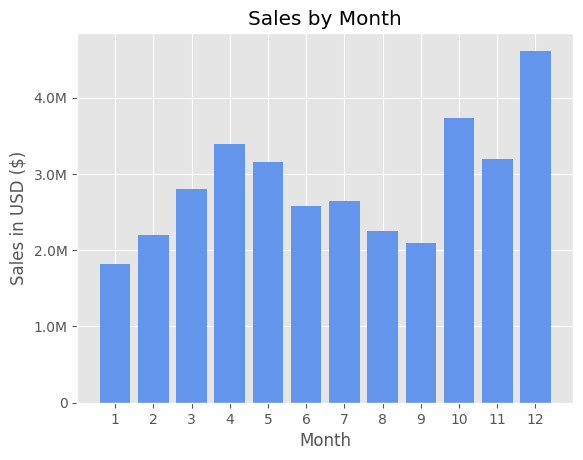

In [280]:
import matplotlib.pyplot as plt
from matplotlib import style

#font size
SMALL = 8
MEDIUM = 12
LARGE = 15
LARGER = 18

style.use('ggplot')
fig, ax = plt.subplots()

def format_number(data_value, indx):
    if data_value >= 1000000:
      formatter = "{:1.1f}M".format(data_value*0.000001)
    else:
        formatter = "{:1.0f}".format(data_value*0.000001)
    return formatter

months = range(1, 13)
ax.bar(months, result_by_months['Sales'], color='cornflowerblue')
plt.xticks(months)
ax.set_xlabel("Month", size=MEDIUM)
ax.set_ylabel("Sales in USD ($)", size=MEDIUM)
ax.set_title("Sales by Month")
ax.yaxis.set_major_formatter(format_number)
plt.show()


December was the month earn highest sales which over 4 million USD, followed by October and November. 

Question 2: What city had the highest number of sales?

We have the similar issue as above that missing City column to answer this question, hence, the process is quitely the same. 

There is Purchase Address column which we can extract the City name from. 

In [203]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City']=all_data["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))

In [204]:
result_by_cities = all_data.groupby('City').sum()
result_by_cities = result_by_cities.drop(columns="Month")
(result_by_cities)

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/1925424819.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_by_cities = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2779908.20,2795498.58
Austin TX,11153,1809873.61,1819581.75
Boston MA,22528,3637409.77,3661642.01
Dallas TX,16730,2752627.82,2767975.40
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Portland ME,2750,447189.25,449758.27
Portland OR,11303,1860558.22,1870732.34
San Francisco CA,50239,8211461.74,8262203.91


It's time to visualize Sales by City.

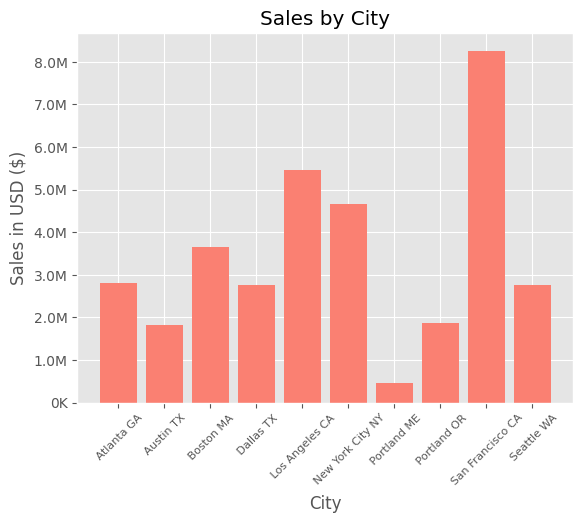

In [277]:
style.use('ggplot')

fig, ax = plt.subplots()

cities = [city for city, df in all_data.groupby('City')]

ax.bar(cities, result_by_cities['Sales'], color='salmon')
plt.xticks(cities, rotation=45, size=8)
ax.set_xlabel("City")
ax.set_ylabel("Sales in USD ($)")
ax.set_title("Sales by City")
ax.yaxis.set_major_formatter(format_number)
plt.show()

San Francisco CA was the city had highest sales (more than 8 million USD), second was Los Angeles CA and New York City NY (both were around 5 million respectively). In this case, we could consider some hypothesis such as: San Francisco CA is a Silicon Valley where more electronic stores located. Besides, high sales number from other two cities could due to population and customer demographic.

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

We get Hour in Order Date column then visualize Sales by Hour.

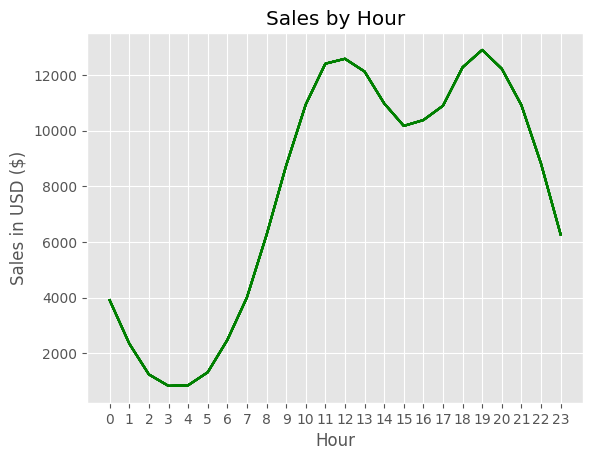

In [279]:

all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

hours = [hour for hour, df in all_data.groupby('Hour')]

style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(hours, all_data.groupby("Hour").count(), color='green')
plt.xticks(hours)
ax.set_xlabel("Hour")
ax.set_ylabel("Sales in USD ($)")
ax.set_title("Sales by Hour")
plt.show()

First noticeablly peak sales were at 11am to 12am which were reasonable because this around lunch time and people get some breaks. Seconly was around 19pm after working. Therefore, two golden hour for Marketing campaign are 11am and 19pm.  

Question 4: What products are most often sold together?
In this case we only focus on sold pair product by spotting all the duplicated Order ID and merge them together. 

In [210]:
dup_order_id = all_data[all_data['Order ID'].duplicated(keep=False)]

dup_order_id['Grouped'] = dup_order_id.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

dup_order_id = dup_order_id[['Order ID', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()
for row in dup_order_id['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/1977903981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_order_id['Grouped'] = dup_order_id.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


Product sold together the most was iPhone with Lightning Charging Cable which was 1005 times, then Google Phone with USB-C Charging Cable was 987 times. Since major mobile phone brands separate phone pack into 2 parts are phone and charging cable, customer demand increase while buying these product.

Question 5: What product sold the most and why?

We will group the product and sum product by Quantity Order then visualize to get better view most sold product. 

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/1086375384.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/1086375384.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_64339/1086375384.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


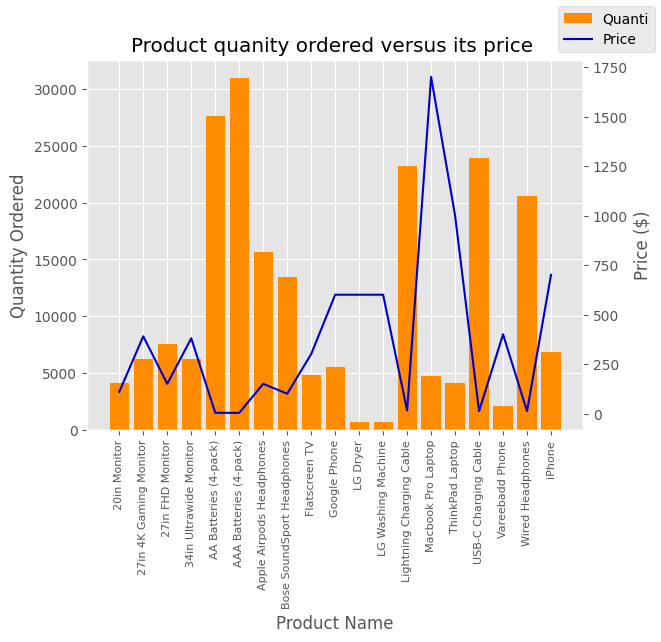

In [273]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
prices = all_data.groupby('Product').mean()['Price Each']

style.use('ggplot')
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='darkorange', label='Quanti')
ax2.plot(products, prices, color='mediumblue', label='Price')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_title("Product quanity ordered versus its price ")
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax2.grid(False)
fig.legend(loc='upper right', title_fontsize=SMALL)



There is negative relationship between product Price and Quantity Ordered. As indicated, large number of AA and AAA Batterries (4-pack) were sold because it's price are under $10. In contrast, when Macbook Pro costs nearly $1750 per item led to low Quantity Order. 

Not only the Price affected Quantity Ordered, product lifespan as well. In this electronic product list, for instance, customer need up to years to buy another new Macbook Laptop or a Washing Machine.

Hence, the product Quantity Ordered significantly depends on product Price and lifespan. 